# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [96]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 7.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 7.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 7.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 7.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 6.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 7.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.0 MB 7.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.3/11.0 MB 6.9 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [35]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [8]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
# rows and columns
data.shape

(5391, 6)

In [7]:
# any NaN values present
data.isna().values.any()

np.False_

In [10]:
# any duplicate rows
dupes = data[data.duplicated()]
print(dupes)

Empty DataFrame
Columns: [Rank, Release_Date, Movie_Title, USD_Production_Budget, USD_Worldwide_Gross, USD_Domestic_Gross]
Index: []


In [11]:
# datatypes for columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [13]:
data_clean = data

In [14]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [15]:
data_clean.USD_Production_Budget = data_clean.USD_Production_Budget.astype(str).str.replace(",", "")

In [16]:
data_clean.USD_Production_Budget = data_clean.USD_Production_Budget.astype(str).str.replace("$", "")

In [17]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,"$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,385907,$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,"$22,000,000","$11,000,000"


In [18]:
data_clean.USD_Production_Budget = pd.to_numeric(data_clean.USD_Production_Budget)

In [19]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,"$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,385907,$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,"$22,000,000","$11,000,000"


In [20]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(2), object(4)
memory usage: 252.8+ KB


#### Convert to numeric

In [22]:
data_clean.USD_Worldwide_Gross = data_clean.USD_Worldwide_Gross.astype(str).str.replace(",", "")
data_clean.USD_Worldwide_Gross = data_clean.USD_Worldwide_Gross.astype(str).str.replace("$", "")
data_clean.USD_Worldwide_Gross = pd.to_numeric(data_clean.USD_Worldwide_Gross)

In [23]:
data_clean.USD_Domestic_Gross = data_clean.USD_Domestic_Gross.astype(str).str.replace(",", "")
data_clean.USD_Domestic_Gross = data_clean.USD_Domestic_Gross.astype(str).str.replace("$", "")
data_clean.USD_Domestic_Gross = pd.to_numeric(data_clean.USD_Domestic_Gross)

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [25]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

#### Convert to Datetime

In [26]:
data_clean.Release_Date = pd.to_datetime(data_clean.Release_Date)

In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [28]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [41]:
pd.reset_option("display.float_format")

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

In [46]:
pd.describe_option('display.float_format')

display.float_format : callable
    The callable should accept a floating point number and return
    a string with the desired format of the number. This is used
    in some places like SeriesFormatter.
    See formats.format.EngFormatter for an example.
    [default: None] [currently: <built-in method format of str object at 0x0000024A9ACA6FF0>]


In [47]:
%precision %.2f

'%.2f'

In [65]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [50]:
pd.options.display.float_format = '{:,.2f}'.format

In [69]:
# Avg production budget
avg_prod_budg = data_clean.USD_Production_Budget.mean()
print('${:,.2f}'.format(avg_prod_budg))

$31,113,737.58


In [70]:
# Avg worldwide gross revenue of films
avg_ww_gross = data_clean.USD_Worldwide_Gross.mean()
print('${:,.2f}'.format(avg_ww_gross))

$88,855,421.96


In [72]:
# Minimums for domestic and worldwide revenue
min_dom = data_clean.USD_Domestic_Gross.min()
min_world = data_clean.USD_Worldwide_Gross.min()

print(f"Minimum Domestic: {min_dom:,.2f}")
print(f"Minimum World: {min_world:,.2f}")

Minimum Domestic: 0.00
Minimum World: 0.00


In [76]:
data_clean.shape

(5391, 6)

In [75]:
data_clean.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [77]:
# Lowest budget
data_clean[data_clean.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [78]:
# Highest Budget
data_clean[data_clean.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [81]:
zero_domestic = data_clean[data_clean.USD_Domestic_Gross == 0]
print(f"Number of films that grossed $0 in US: {len(zero_domestic)}")
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 in US: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [80]:
zero_world = data_clean[data_clean.USD_Worldwide_Gross == 0]
print(f"Number of films that grossed $0 worldwide: {len(zero_world)}")
zero_world.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

However, this is not the only technique we can use to make multiple comparisons.


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In this case, we enclose the entire query inside a string.

In [82]:
international_releases = data_clean.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f"Number of international releases: {len(international_releases)}")
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [83]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [84]:
future_releases = data_clean[data_clean.Release_Date >= scrape_date]
print(f"Number of unreleased films: {len(future_releases)}")
future_releases

Number of unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [92]:
# Already Created data_clean so using clean_data
clean_data = data_clean.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

Again, there are different ways you could have calculated this. For example, using the .loc[] property,

In [90]:
money_losing = clean_data.loc[clean_data.USD_Production_Budget > clean_data.USD_Worldwide_Gross]
len(money_losing)/len(clean_data)

0.37

or the .query() function

In [94]:
money_losing = clean_data.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/clean_data.shape[0]

0.37

# Seaborn for Data Viz: Bubble Charts

## Scatter Plots

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

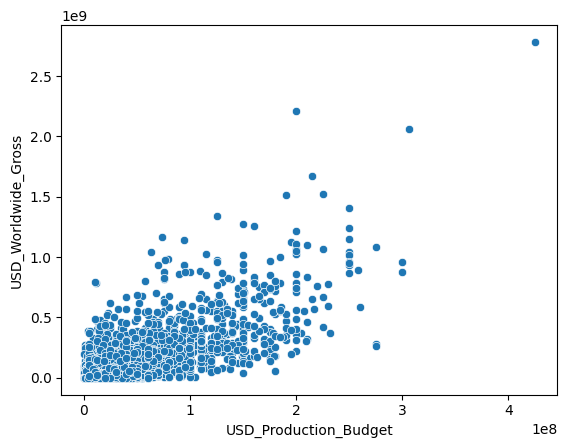

In [98]:
sns.scatterplot(
    data=clean_data, 
    x="USD_Production_Budget", 
    y="USD_Worldwide_Gross")

That should look familiar. 😊 Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure:

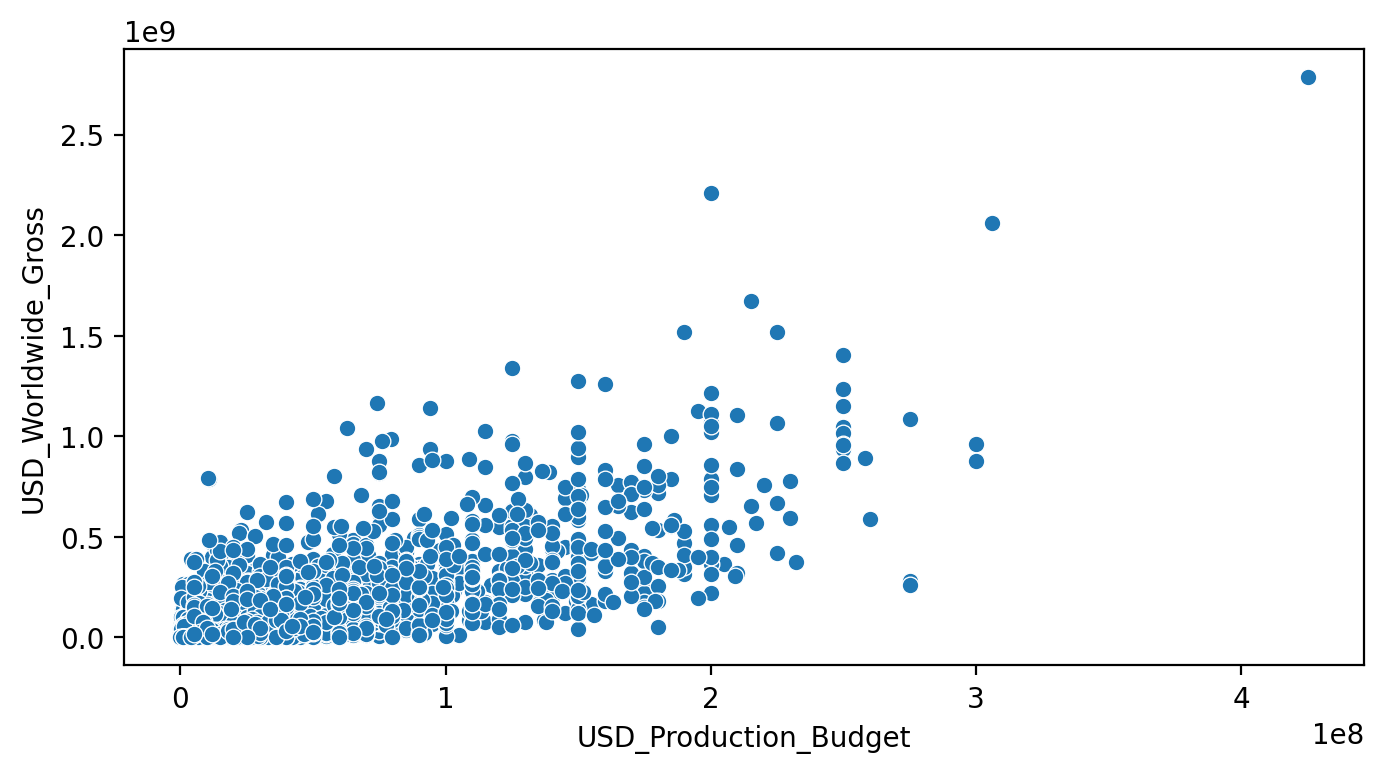

In [99]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(
    data=clean_data,
    x="USD_Production_Budget", 
    y="USD_Worldwide_Gross")

plt.show()

And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-15_09-19-14-d55c7a6c5b664184458469f081502617.png">

Here's how:

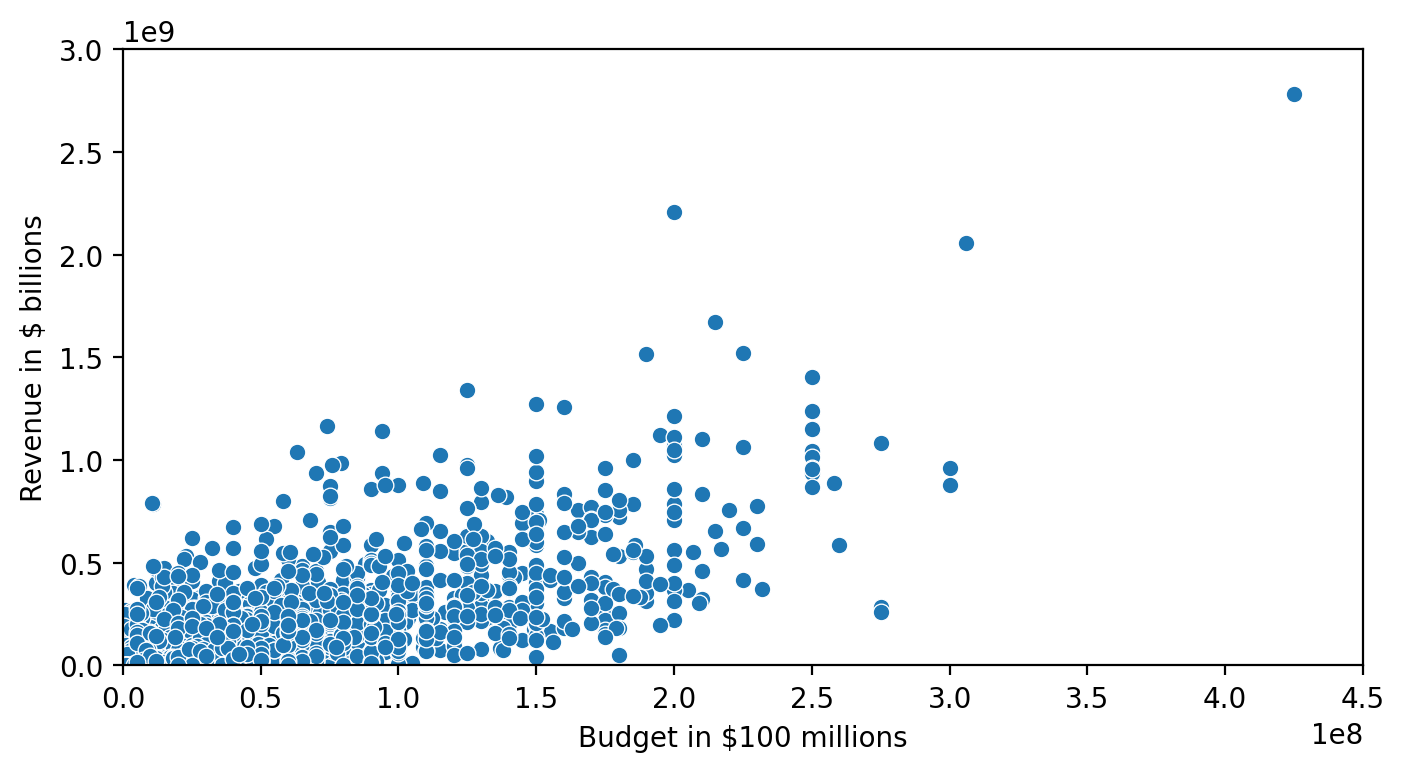

In [100]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(
    data=clean_data,
    x="USD_Production_Budget", 
    y="USD_Worldwide_Gross")

ax.set(
    ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')


plt.show()

### From Scatter Plot to Bubble Chart

But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

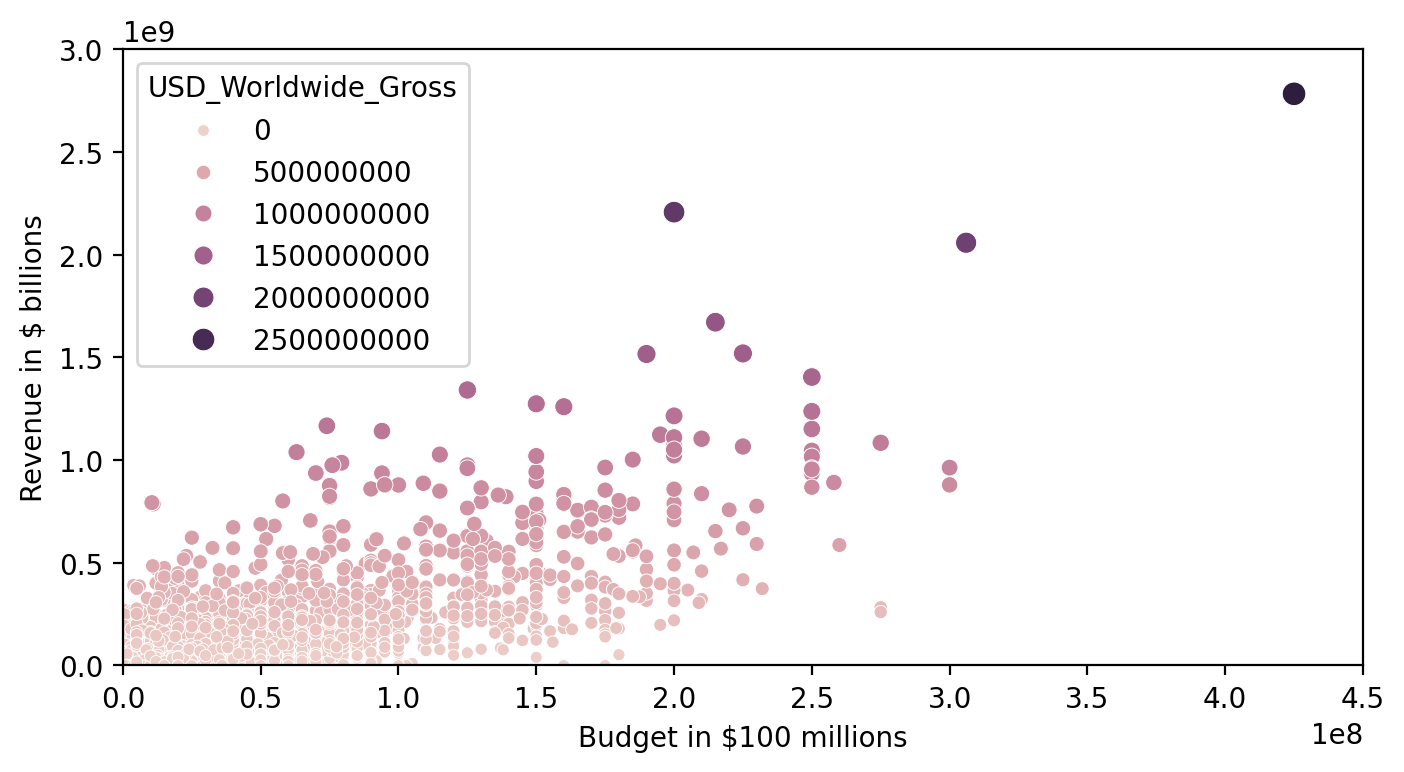

In [101]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # color
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen with used already when it comes to opening files in previous lessons.

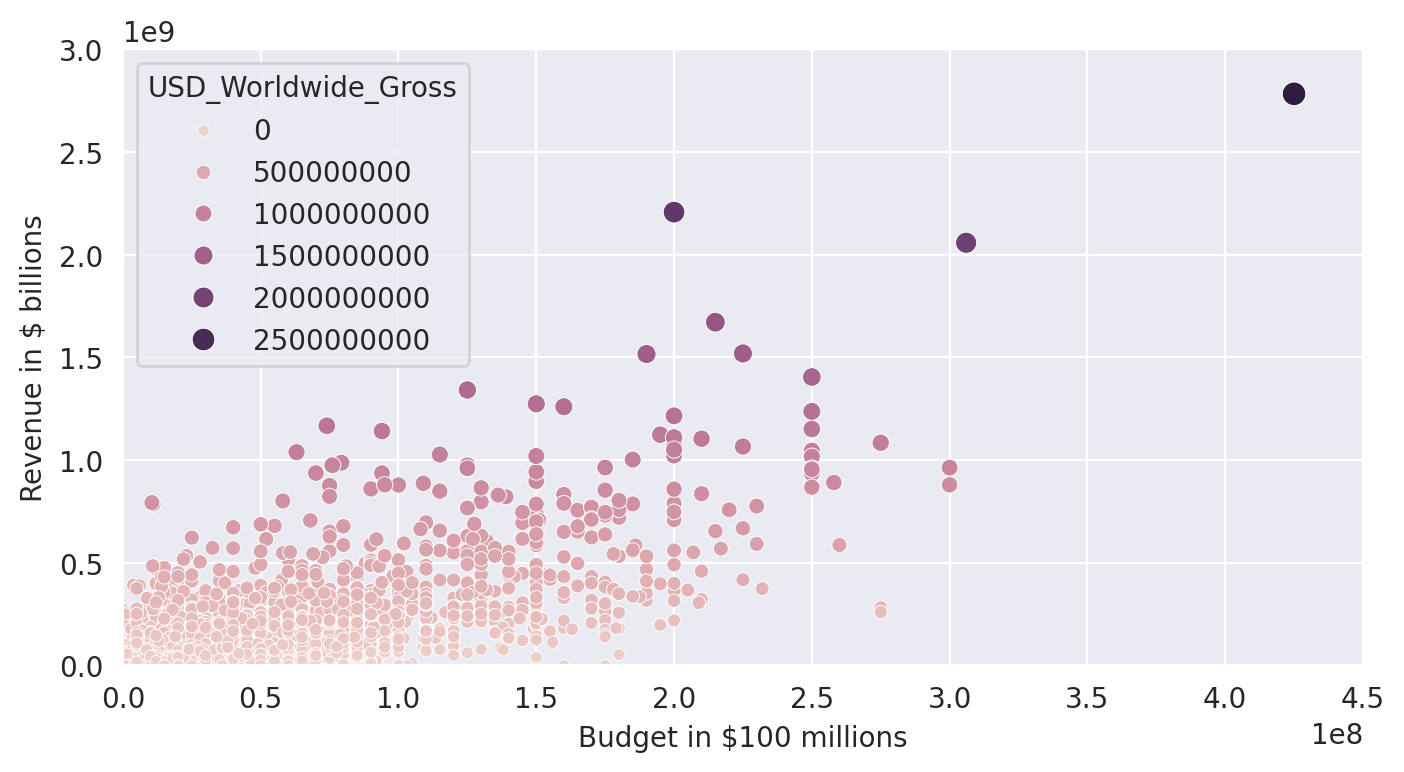

In [102]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



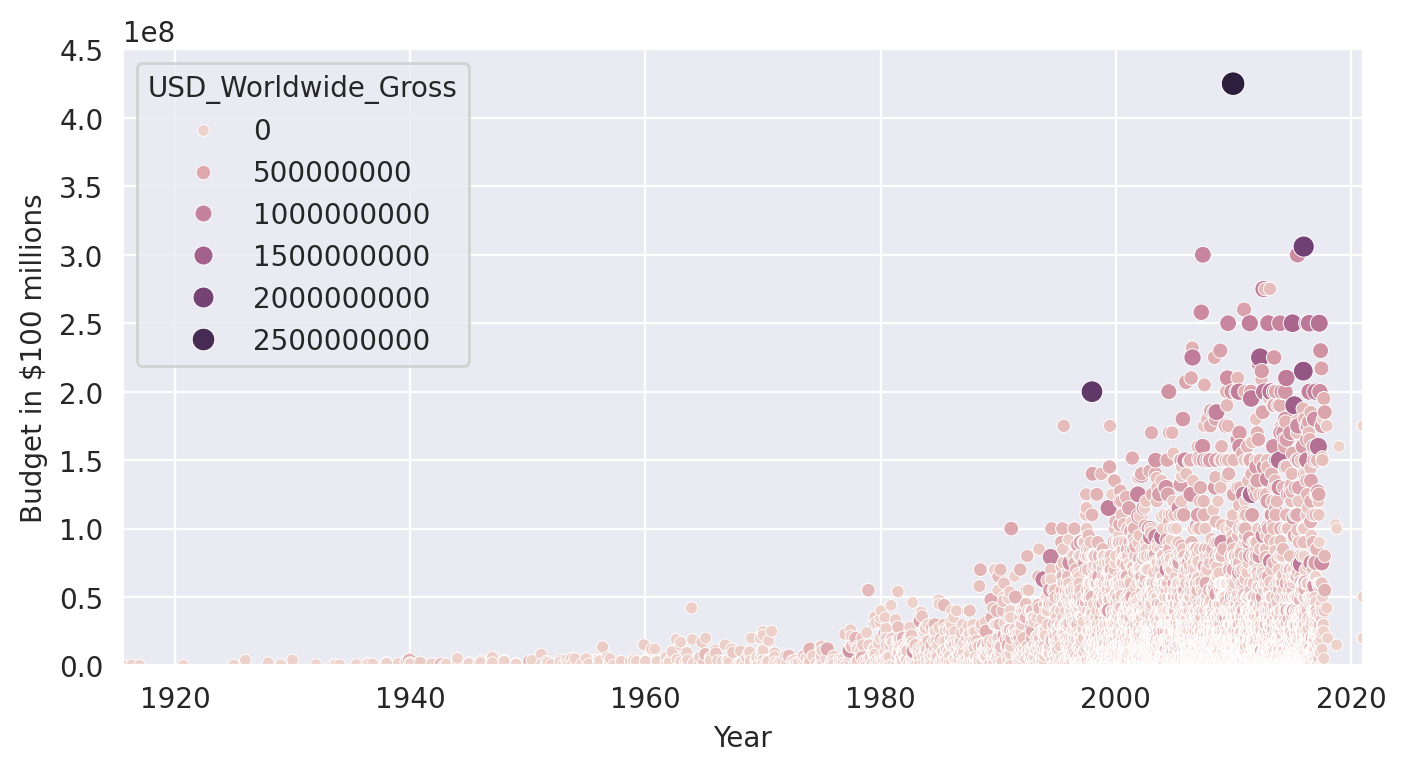

In [103]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

To create a DatetimeIndex, we just call the constructor and provide our release date column as an argument to initialise the DatetimeIndex object. Then we can extract all the years from the DatetimeIndex.

In [108]:
dt_index = pd.DatetimeIndex(clean_data.Release_Date)
years = dt_index.year

Now, all we need to do is convert the years to decades. For that, we will use floor division (aka integer division). The difference to regular division is that the result is effectively rounded down.

In our case, we will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:



In [105]:
# Convert 1999 to 90s decade
1999 // 10

199

In [106]:
199*10

1990

In [109]:
decades = years//10*10
clean_data['Decade'] = decades

In [110]:
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


We can do this for all the years and then add the decades back as a column.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [111]:
old_films = clean_data[clean_data.Decade <= 1960]

In [112]:
new_films = clean_data[clean_data.Decade > 1960]

In [114]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [115]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

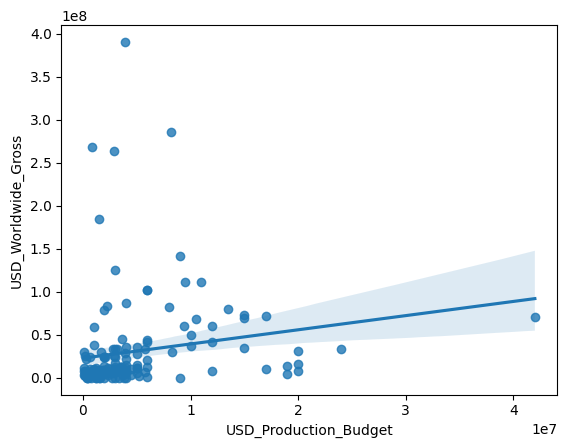

In [116]:
sns.regplot(
    data=old_films,
    x='USD_Production_Budget',
    y='USD_Worldwide_Gross'
)

This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

To style the chart further, we can once again, drop into the Matplotlib layer and supply keyword arguments as dictionaries. We can customise the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

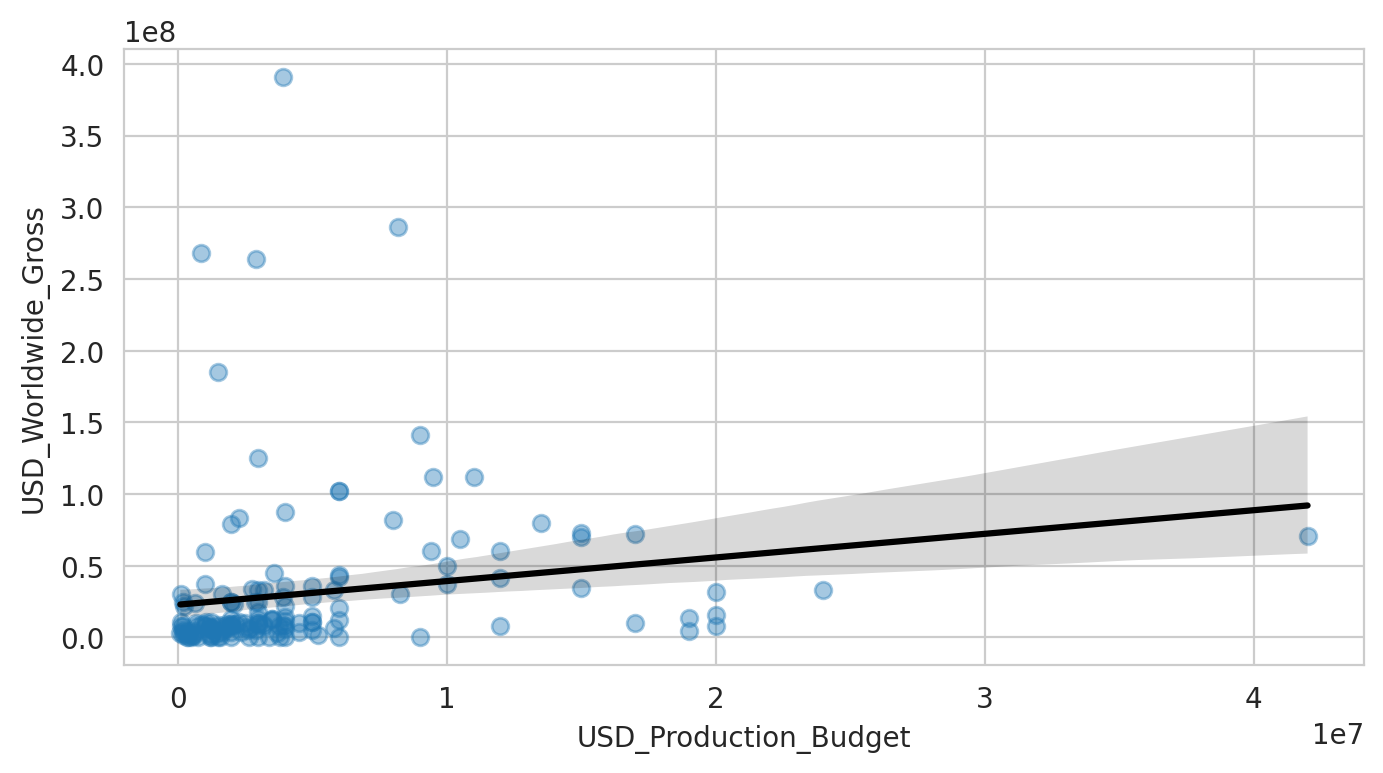

In [117]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

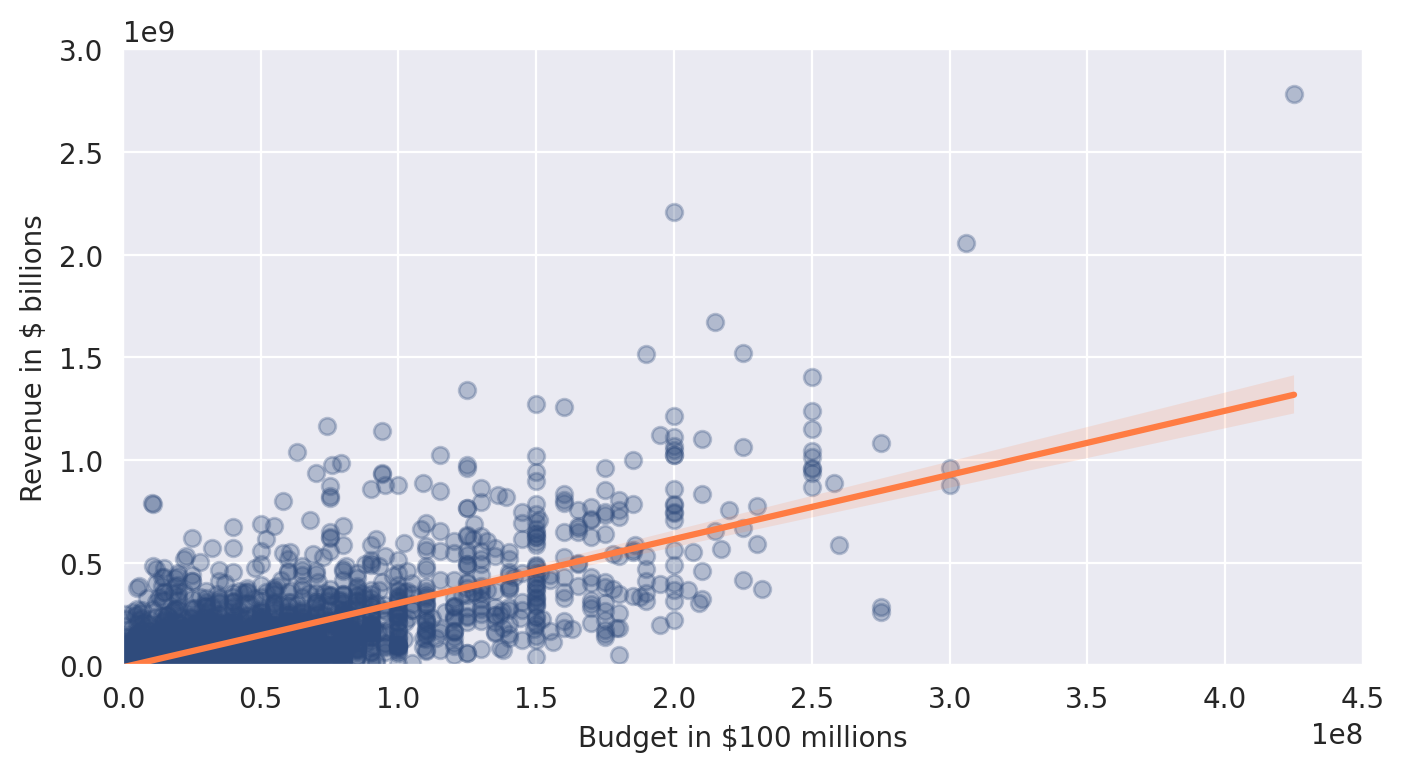

In [118]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})

    ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions'
    )


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-19-24-b9cd86771c12cda554da251a16471df9.png">

Now we can run a LinearRegression. First, let's create a LinearRegression object that will do the work for us.

In [124]:
regression = LinearRegression()

Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:

In [125]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames here.

Now it's time to get to work and run the calculations:

In [126]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

In [127]:
# Theta-zero
regression.intercept_

array([-8650768.00661042])

In [128]:
# Theta-one
regression.coef_

array([[3.12259592]])

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 